# Études de l'ambivalence des formes en latin classique

## Objectifs: 

Obtenir une mesure du nombre moyenne d'analyse et de lemma attribuables à une forme

## Étapes

1. Récupérer les formes et les stockers, grâce à CollatinusDecliner
2. Séries Pandas
3. Graphe

## Étape 1 : Récupération

In [2]:
from cltk.stem.latin.declension import CollatinusDecliner

# Update
from cltk.corpus.utils.importer import CorpusImporter

corpus_importer = CorpusImporter('latin')
corpus_importer.import_corpus('latin_models_cltk')


In [23]:
from collections import defaultdict
decliner = CollatinusDecliner()

lemma_per_form = defaultdict(set)
analysis_per_form = defaultdict(lambda: 0)

for lemma in decliner._lemmas:
    try:
        for form, _ in decliner.decline(lemma):
            if form:
                lemma_per_form[form].add(lemma)
                analysis_per_form[form] += 1
    except KeyError:
        print(lemma)

bovile
Sophocles
tu
Xenocrates


In [26]:
lemma_per_form["ior"]
decliner.decline("uvifer")

[('uvifer', '--s---mn-'),
 ('uvifer', '--s---mv-'),
 ('uviferum', '--s---ma-'),
 ('uviferi', '--s---mg-'),
 ('uvifero', '--s---md-'),
 ('uvifero', '--s---mb-'),
 ('uviferi', '--p---mn-'),
 ('uviferi', '--p---mv-'),
 ('uviferos', '--p---ma-'),
 ('uviferorum', '--p---mg-'),
 ('uviferis', '--p---md-'),
 ('uviferis', '--p---mb-'),
 ('uvifera', '--s---fn-'),
 ('uvifera', '--s---fv-'),
 ('uviferam', '--s---fa-'),
 ('uviferae', '--s---fg-'),
 ('uviferae', '--s---fd-'),
 ('uvifera', '--s---fb-'),
 ('uviferae', '--p---fn-'),
 ('uviferae', '--p---fv-'),
 ('uviferas', '--p---fa-'),
 ('uviferarum', '--p---fg-'),
 ('uviferis', '--p---fd-'),
 ('uviferis', '--p---fb-'),
 ('uviferum', '--s---nn-'),
 ('uviferum', '--s---nv-'),
 ('uviferum', '--s---na-'),
 ('uviferi', '--s---ng-'),
 ('uvifero', '--s---nd-'),
 ('uvifero', '--s---nb-'),
 ('uvifera', '--p---nn-'),
 ('uvifera', '--p---nv-'),
 ('uvifera', '--p---na-'),
 ('uviferorum', '--p---ng-'),
 ('uviferis', '--p---nd-'),
 ('uviferis', '--p---nb-'),
 ('i

In [12]:
lemma_per_form = {key: len(val) for key, val in lemma_per_form.items()}

## Étape 2 : Séries panda

In [16]:
from pandas import DataFrame, Series

lf_df = Series(lemma_per_form)
af_df = Series(analysis_per_form)

## Étape 3 : Plot

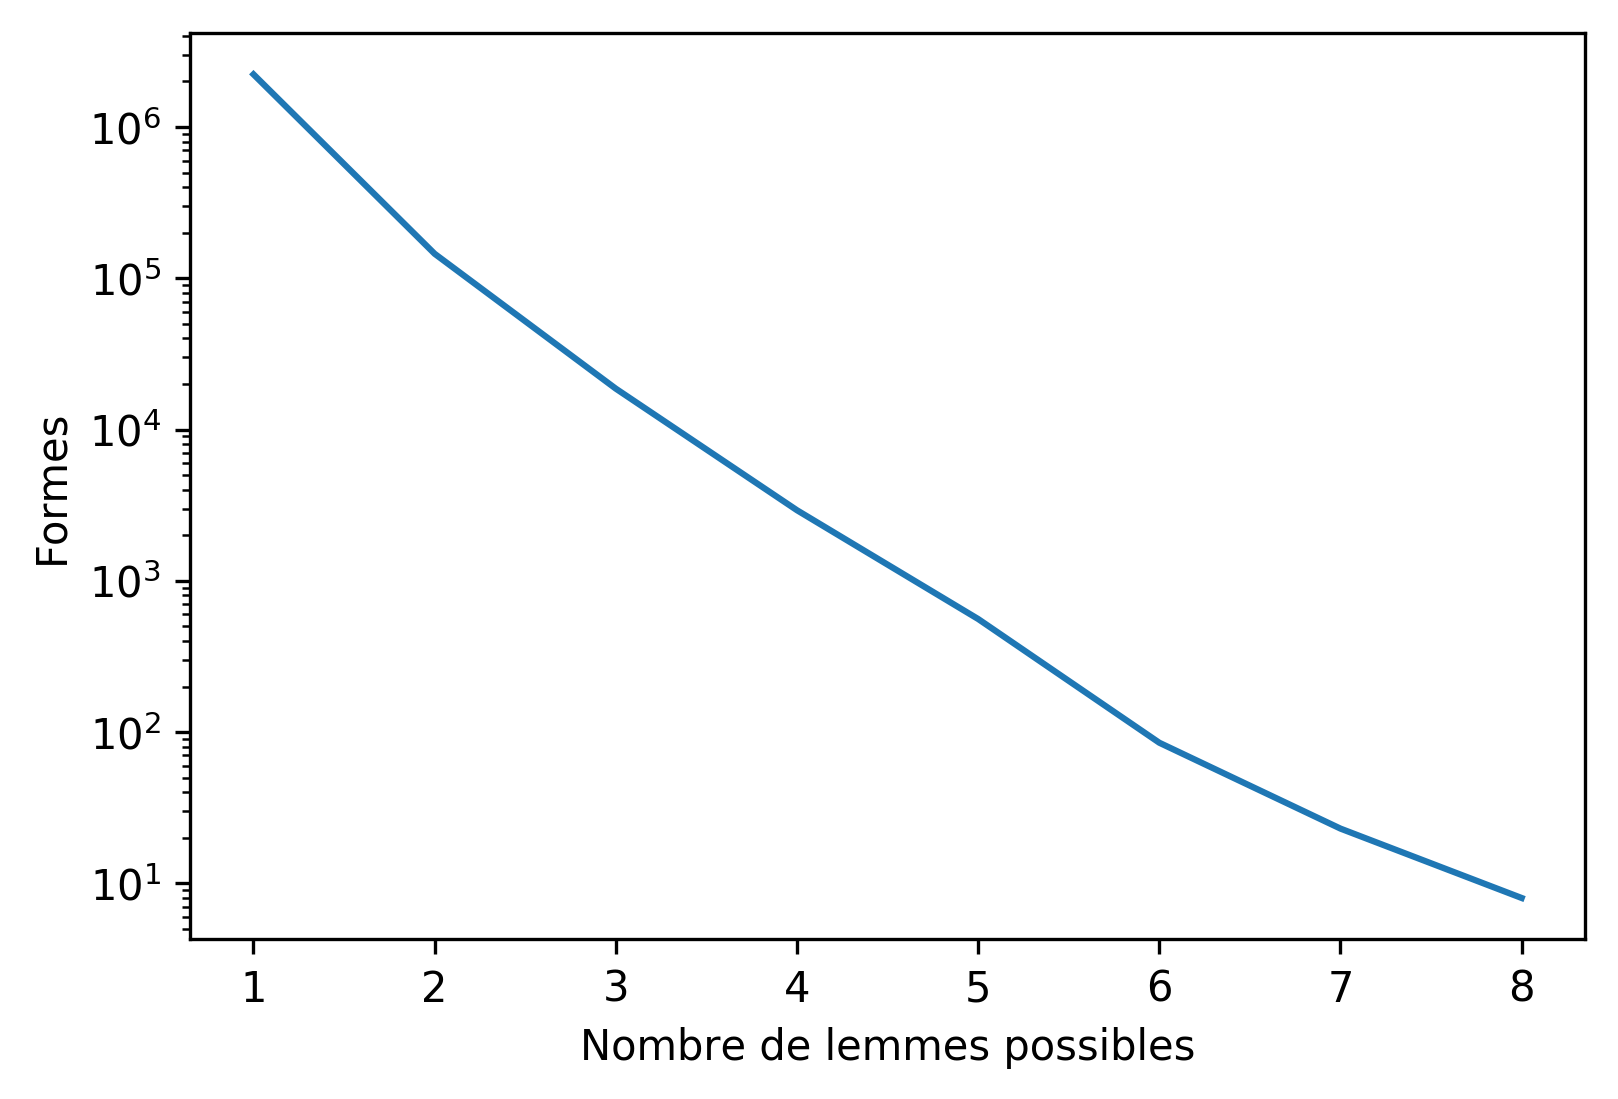

In [80]:
import matplotlib
#lf_df[lf_df <= 9].plot.box() # <= 9 because there is a damn bug with the decliner in 0.1.116

lf_df_freq = Series({index: len(lf_df[lf_df == index]) for index in range(1, 9)})
ax = lf_df_freq.plot(logy=True)
ax.set_ylabel("Formes")
ax.set_xlabel("Nombre de lemmes possibles")
fig = ax.get_figure()
fig.set_dpi(300)

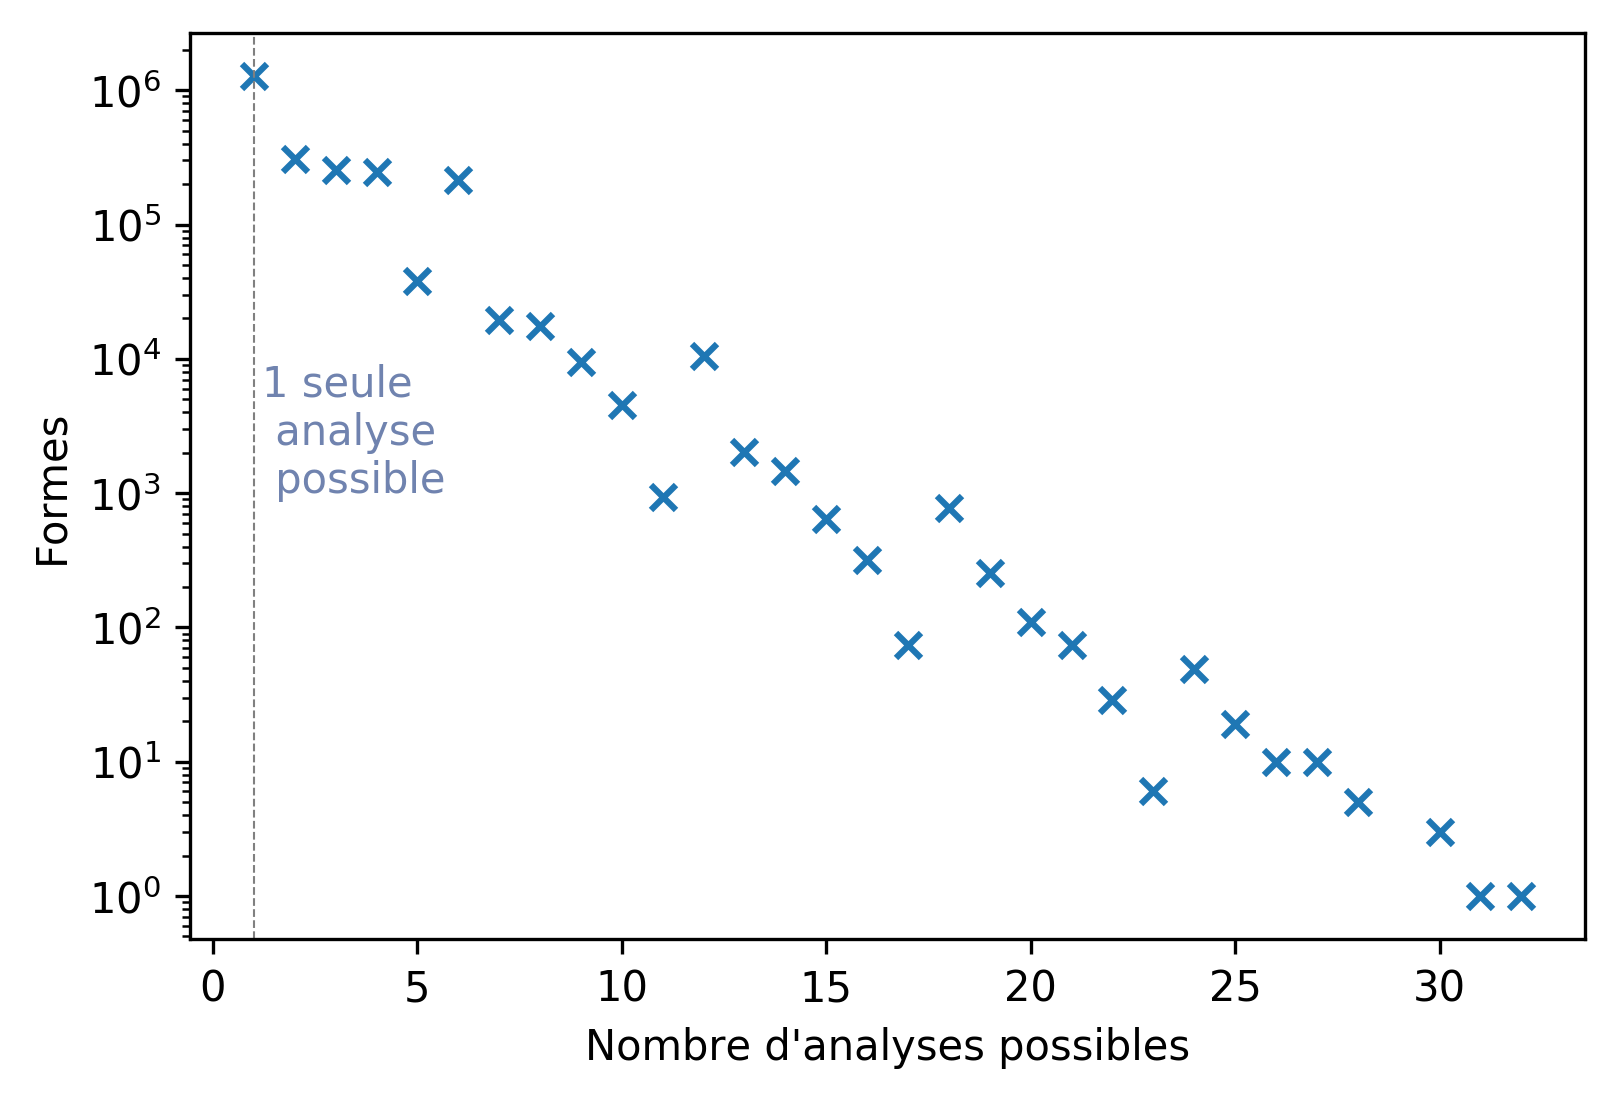

In [124]:
#print(af_df[af_df < 33].nlargest(100))
from matplotlib import pyplot as plt
#ax = af_df[af_df < 33].plot.box()
# < 33 because there is a damn bug with the decliner in 0.1.116 + 
#   33 is the number of forms possible for invariables

#af_df_freq = Series({index: len(af_df[af_df == index]) for index in range(1, 32)})

fig = plt.figure()
ax = plt.gca()
ax.set_yscale('log')
ax.axvline(x=1, label="1", color="gray", linewidth=0.5, linestyle="--")
ax.scatter(
    x=list(range(1, 33)),
    y=[len(af_df[af_df == index]) for index in range(1, 33)],
    marker="x"
)
ax.text(x=1.2, y=10e2, s='1 seule \n analyse \n possible', alpha=0.7, color='#334f8d')
ax.set_ylabel("Formes")
ax.set_xlabel("Nombre d'analyses possibles")
fig.set_dpi(300)